## Обработаем данные из юнктада

In [315]:
import pandas as pd
df = pd.read_csv('export.csv')
df.head()

,Economy_Label,Year,US_at_current_prices_in_millions_Value
0,Algeria,2002,18799.0
1,Algeria,2003,23163.0
2,Algeria,2004,31304.0
3,Algeria,2005,46002.4
4,Algeria,2006,54613.0


In [316]:
df['Economy_Label'].unique()

array(['Algeria', 'American Samoa', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Barbados', 'Belize',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Cabo Verde',
       'Cameroon', 'Cayman Islands', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'Colombia', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Curacao', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Falkland Islands (Malvinas)',
       'Fiji', 'French Polynesia', 'Gabon', 'Georgia', 'Ghana', 'Grenada',
       'Guam', 'Guatemala', 'Guyana', 'Honduras', 'India', 'Indonesia',
       'Indonesia (...2002)', 'Iran (Islamic Republic of)', 'Iraq',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya',

In [317]:
excluded_countries = ['Anguilla',
    'Bonaire, Sint Eustatius and Saba',
    'China, Taiwan Province of',
    'Cook Islands',
    'Falkland Islands (Malvinas)',
    'Montserrat',
    'Netherlands Antilles',
    'Niue',
    'Panama, excluding Canal Zone',
    'Saint Helena',
    'State of Palestine',
    'Tokelau',
    'Wallis and Futuna Islands',
    'Developing economies excluding LDCs']
df = df[~(df['Economy_Label'].isin(excluded_countries))]
df['Economy_Label'].unique()

array(['Algeria', 'American Samoa', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados',
       'Belize', 'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Cabo Verde',
       'Cameroon', 'Cayman Islands', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Curacao', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Fiji', 'French Polynesia',
       'Gabon', 'Georgia', 'Ghana', 'Grenada', 'Guam', 'Guatemala',
       'Guyana', 'Honduras', 'India', 'Indonesia', 'Indonesia (...2002)',
       'Iran (Islamic Republic of)', 'Iraq', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kenya', "Korea, Dem. People's Rep. of", 'Kuwait',
       'Kyrgyzstan', 'Lebanon', 'Libya', 'Malaysia', 'Maldives',
       'Marshall Islands', 'Mauritius

In [318]:
df_import = pd.read_csv('import.csv')
df_gdp = pd.read_csv('gdp.csv')

df = df.merge(df_import, how='inner', on=['Economy_Label', 'Year'])
df = df.merge(df_gdp, how='inner', on=['Economy_Label', 'Year'])
df.head()

,Economy_Label,Year,US_at_current_prices_in_millions_Value_x,US_at_current_prices_in_millions_Value_y,US_at_current_prices_in_millions_Value
0,Algeria,2002,18799.0,11969.3,56819.0
1,Algeria,2003,23163.0,12380.4,67864.0
2,Algeria,2004,31304.0,18168.6,85333.0
3,Algeria,2005,46002.4,20357.0,103198.0
4,Algeria,2006,54613.0,21456.0,117027.0


In [319]:
df.columns = ['country', 'year', 'export', 'import', 'gdp']
df.head()

,country,year,export,import,gdp
0,Algeria,2002,18799.0,11969.3,56819.0
1,Algeria,2003,23163.0,12380.4,67864.0
2,Algeria,2004,31304.0,18168.6,85333.0
3,Algeria,2005,46002.4,20357.0,103198.0
4,Algeria,2006,54613.0,21456.0,117027.0


In [320]:
df['trade_turnover'] = df['export'] + df['import']
df['export_share'] = df['export'] / df['gdp']
df['turnover_share'] = df['trade_turnover'] / df['gdp']
df.head()

,country,year,export,import,gdp,trade_turnover,export_share,turnover_share
0,Algeria,2002,18799.0,11969.3,56819.0,30768.3,0.330858,0.541514
1,Algeria,2003,23163.0,12380.4,67864.0,35543.4,0.341315,0.523745
2,Algeria,2004,31304.0,18168.6,85333.0,49472.6,0.366845,0.579759
3,Algeria,2005,46002.4,20357.0,103198.0,66359.4,0.445768,0.643030
4,Algeria,2006,54613.0,21456.0,117027.0,76069.0,0.466670,0.650012


In [321]:
import numpy as np

df['export_share'] = np.log(df['export_share'])
df['turnover_share'] = np.log(df['turnover_share'])
df.head()

,country,year,export,import,gdp,trade_turnover,export_share,turnover_share
0,Algeria,2002,18799.0,11969.3,56819.0,30768.3,-1.106067,-0.613386
1,Algeria,2003,23163.0,12380.4,67864.0,35543.4,-1.074950,-0.646751
2,Algeria,2004,31304.0,18168.6,85333.0,49472.6,-1.002815,-0.545142
3,Algeria,2005,46002.4,20357.0,103198.0,66359.4,-0.807956,-0.441564
4,Algeria,2006,54613.0,21456.0,117027.0,76069.0,-0.762133,-0.430764


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         2226 non-null   object 
 1   year            2226 non-null   int64  
 2   export          2187 non-null   float64
 3   import          2187 non-null   float64
 4   gdp             2187 non-null   float64
 5   trade_turnover  2187 non-null   float64
 6   export_share    2187 non-null   float64
 7   turnover_share  2187 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 139.3+ KB


In [323]:
df[df['export'].isna()]

,country,year,export,import,gdp,trade_turnover,export_share,turnover_share
567,Curacao,2002,NaN,NaN,NaN,NaN,NaN,NaN
568,Curacao,2003,NaN,NaN,NaN,NaN,NaN,NaN
569,Curacao,2004,NaN,NaN,NaN,NaN,NaN,NaN
570,Curacao,2005,NaN,NaN,NaN,NaN,NaN,NaN
571,Curacao,2006,NaN,NaN,NaN,NaN,NaN,NaN
572,Curacao,2007,NaN,NaN,NaN,NaN,NaN,NaN
573,Curacao,2008,NaN,NaN,NaN,NaN,NaN,NaN
574,Curacao,2009,NaN,NaN,NaN,NaN,NaN,NaN
575,Curacao,2010,NaN,NaN,NaN,NaN,NaN,NaN
945,Indonesia,2002,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
df = df[df['export'].isna()==False]
df.loc[df['country'] == 'Indonesia (...2002)', 'country'] = 'Indonesia'

In [325]:
df.to_csv('prepped_data.csv', index=False)

## Получим данные из Всемирного Банка
Сначала получим коды для стран, затем получим по ним показатели

In [326]:
import requests

def get_country_codes():
    url = 'http://api.worldbank.org/v2/country?format=json&per_page=300'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        countries = data[1]
        country_codes = {country['name']: country['iso2Code'] for country in countries}
        return country_codes
    else:
        return None

country_codes = get_country_codes()
if not country_codes:
    print("Failed to fetch country codes")

df_country_codes = pd.DataFrame(list(country_codes.items()), columns=['name', 'iso2Code'])
df_country_codes

,name,iso2Code
0,Aruba,AW
1,Africa Eastern and Southern,ZH
2,Afghanistan,AF
3,Africa,A9
4,Africa Western and Central,ZI
...,...,...
291,Sub-Saharan Africa excluding South Africa and ...,A5
292,"Yemen, Rep.",YE
293,South Africa,ZA
294,Zambia,ZM


### Смерджим страны из юнктада и всемирного банка
Для этого удобно будет использовать расстояние Левенштейна, чтобы было меньше проблем из-за разного написания стран

In [327]:
from levenpandas import fuzzymerge, testpath
import pandas as pd

df = pd.read_csv('prepped_data.csv')
df_dict = df[['country', 'year']]


df_dict = fuzzymerge(df_dict, df_country_codes, left_on='country', right_on='name', how='left', threshold=0.9)
with pd.option_context("display.max_rows", 1000):
    display(df_dict)

,country,year,name,iso2Code
0,Algeria,2002,Algeria,DZ
1,Antigua and Barbuda,2002,Antigua and Barbuda,AG
2,Argentina,2002,Argentina,AR
3,Armenia,2002,Armenia,AM
4,Aruba,2002,Aruba,AW
5,Azerbaijan,2002,Azerbaijan,AZ
6,Bahamas,2002,NaN,NaN
7,Bahrain,2002,Bahrain,BH
8,Barbados,2002,Barbados,BB
9,Belize,2002,Belize,BZ


In [328]:
df_dict[df_dict['name'].isna()]

,country,year,name,iso2Code
6,Bahamas,2002,NaN,NaN
10,Bolivia (Plurinational State of),2002,NaN,NaN
20,"China, Hong Kong SAR",2002,NaN,NaN
21,"China, Macao SAR",2002,NaN,NaN
23,Congo,2002,NaN,NaN
31,Egypt,2002,NaN,NaN
46,Iran (Islamic Republic of),2002,NaN,NaN
53,Kyrgyzstan,2002,NaN,NaN
61,Micronesia (Federated States of),2002,NaN,NaN
79,Saint Lucia,2002,NaN,NaN


### Вручную проставим недостающие коды

In [329]:
with pd.option_context("display.max_rows", 1000):
    display(df_country_codes)

,name,iso2Code
0,Aruba,AW
1,Africa Eastern and Southern,ZH
2,Afghanistan,AF
3,Africa,A9
4,Africa Western and Central,ZI
5,Angola,AO
6,Albania,AL
7,Andorra,AD
8,Arab World,1A
9,United Arab Emirates,AE


In [330]:
df_dict.loc[df_dict['country'] == 'Bahamas', 'iso2Code'] = 'BS'
df_dict.loc[df_dict['country'] == 'Bolivia (Plurinational State of)', 'iso2Code'] = 'BO'
df_dict.loc[df_dict['country'] == 'China, Hong Kong SAR', 'iso2Code'] = 'HK'
df_dict.loc[df_dict['country'] == 'China, Macao SAR', 'iso2Code'] = 'MO'
df_dict.loc[df_dict['country'] == 'Congo', 'iso2Code'] = 'CG'
df_dict.loc[df_dict['country'] == 'Egypt', 'iso2Code'] = 'EG'
df_dict.loc[df_dict['country'] == 'Iran (Islamic Republic of)', 'iso2Code'] = 'IR'
df_dict.loc[df_dict['country'] == 'Kyrgyzstan', 'iso2Code'] = 'KG'
df_dict.loc[df_dict['country'] == 'Micronesia (Federated States of)', 'iso2Code'] = 'FM'
df_dict.loc[df_dict['country'] == 'Saint Lucia', 'iso2Code'] = 'LC'
df_dict.loc[df_dict['country'] == 'Venezuela (Bolivarian Rep. of)', 'iso2Code'] = 'VE'

df_dict[df_dict['name'].isna()]

,country,year,name,iso2Code
6,Bahamas,2002,NaN,BS
10,Bolivia (Plurinational State of),2002,NaN,BO
20,"China, Hong Kong SAR",2002,NaN,HK
21,"China, Macao SAR",2002,NaN,MO
23,Congo,2002,NaN,CG
31,Egypt,2002,NaN,EG
46,Iran (Islamic Republic of),2002,NaN,IR
53,Kyrgyzstan,2002,NaN,KG
61,Micronesia (Federated States of),2002,NaN,FM
79,Saint Lucia,2002,NaN,LC


In [331]:
country_codes = list(df_dict['iso2Code'].unique())
print(country_codes)

['DZ', 'AG', 'AR', 'AM', 'AW', 'AZ', 'BS', 'BH', 'BB', 'BZ', 'BO', 'BW', 'BR', 'VG', 'BN', 'CV', 'CM', 'KY', 'CL', 'CN', 'HK', 'MO', 'CO', 'CG', 'CR', 'CI', 'CU', 'CW', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'SZ', 'FJ', 'PF', 'GA', 'GE', 'GH', 'GD', 'GT', 'GY', 'HN', 'IN', 'ID', 'IR', 'IQ', 'JM', 'JO', 'KZ', 'KE', 'KW', 'KG', 'LB', 'LY', 'MY', 'MV', 'MH', 'MU', 'MX', 'FM', 'MN', 'MA', 'NA', 'NR', 'NC', 'NI', 'NG', 'OM', 'PK', 'PW', 'PA', 'PG', 'PY', 'PE', 'PH', 'QA', 'KN', 'LC', 'VC', 'WS', 'SA', 'SC', 'SG', 'SX', 'ZA', 'LK', 'SR', 'SY', 'TJ', 'TH', 'TO', 'TT', 'TN', 'TR', 'TM', 'TC', 'AE', 'UY', 'UZ', 'VU', 'VE', 'VN', 'ZW']


In [332]:
df_dict = df_dict[['country', 'iso2Code']]

df = df.merge(df_dict, how='left', on='country')
df.head()

,country,year,export,import,gdp,trade_turnover,export_share,turnover_share,iso2Code
0,Algeria,2002,18799.0,11969.3,56819.0,30768.3,-1.106067,-0.613386,DZ
1,Algeria,2003,23163.0,12380.4,67864.0,35543.4,-1.074950,-0.646751,DZ
2,Algeria,2004,31304.0,18168.6,85333.0,49472.6,-1.002815,-0.545142,DZ
3,Algeria,2005,46002.4,20357.0,103198.0,66359.4,-0.807956,-0.441564,DZ
4,Algeria,2006,54613.0,21456.0,117027.0,76069.0,-0.762133,-0.430764,DZ


### Получим данные из api World Bank
Получаем следующие показатели:
- **'Gini Index'** - Индекс Джини измеряет степень, в которой распределение доходов (или, в некоторых случаях, потребительских расходов) между отдельными лицами или домохозяйствами в рамках экономики отличается от абсолютно равного распределения. Кривая Лоренца отображает совокупное процентное соотношение общего полученного дохода к общему числу получателей, начиная с самого бедного человека или домохозяйства. Индекс Джини измеряет площадь между кривой Лоренца и гипотетической линией абсолютного равенства, выраженную в процентах от максимальной площади под линией. Таким образом, индекс Джини, равный 0, означает абсолютное равенство, в то время как индекс, равный 100, подразумевает абсолютное неравенство.
- **'Industry, value added (% of GDP)'** - Промышленность соответствует подразделам 10-45 МСОК и включает обрабатывающую промышленность (разделы 15-37 МСОК). Она включает добавленную стоимость в горнодобывающей промышленности, обрабатывающей промышленности (также выделенной в отдельную подгруппу), строительстве, электроэнергетике, водоснабжении и газоснабжении. Добавленная стоимость - это чистый выпуск отрасли после суммирования всех выпусков и вычета промежуточных затрат. Она рассчитывается без учета амортизации производственных активов или истощения и деградации природных ресурсов. Происхождение добавленной стоимости определяется в соответствии с Международной стандартной отраслевой классификацией (МСОК) в 3 или 4 редакции.
- **'Adequacy of benefits (%) - All Labor Market'** - Адекватность пособий по безработице и активных программ на рынке труда (ALMP) измеряется общей суммой трансфертов, получаемых населением, участвующим в пособиях по безработице и активных программах на рынке труда, как доля от их общего благосостояния. Благосостояние определяется как общий доход или общие расходы домохозяйств-получателей. Пособия по безработице и активные программы на рынке труда включают компенсацию по безработице, выходное пособие и досрочный выход на пенсию по причинам, связанным с рынком труда, услуги на рынке труда (посредничество), обучение (профессиональное, жизненные навыки и денежные средства на обучение), ротацию и совместное трудоустройство, стимулы к трудоустройству и субсидии на заработную плату, поддержку в трудоустройстве и реабилитации, и меры по обеспечению занятости инвалидов. Оценки включают как прямых, так и косвенных бенефициаров.
- **'School enrollment, primary (% gross)'** - Общий коэффициент охвата образованием - это отношение общего числа учащихся, независимо от возраста, к численности населения возрастной группы, которая официально соответствует указанному уровню образования.
- **'Control of Corruption: Estimate'** - Борьба с коррупцией отражает представления о том, в какой степени государственная власть используется для получения личной выгоды, включая как мелкие, так и крупные формы коррупции, а также "захват" государства элитами и частными интересами.
- **'Population ages 15-64 (% of total population)'** - Доля взрослого населения
- **'Population ages 15-64, male'** - Доля взрослого мужского населения 
- **'Domestic credit provided by financial sector (% of GDP)'** - Внутренние кредиты, предоставляемые финансовым сектором, включают все кредиты различным секторам в валовом выражении, за исключением кредитов центральному правительству, которые являются чистыми. Финансовый сектор включает в себя органы денежно-кредитного регулирования и депозитные банки, а также другие финансовые корпорации, по которым имеются данные (включая корпорации, которые не принимают переводные депозиты, но несут такие обязательства, как срочные и сберегательные депозиты). Примерами других финансовых корпораций являются финансовые и лизинговые компании, ростовщики, страховые корпорации, пенсионные фонды и валютные компании.

In [333]:
import requests
import pandas as pd

country_codes = list(df['iso2Code'].unique())

indicators = {
    'Gini Index': 'SI.POV.GINI',
    'Industry, value added (% of GDP)': 'NV.IND.TOTL.ZS',
    'Adequacy of benefits (%) - All Labor Market': 'SL.LBL.BMAT.ZS',
    'School enrollment, primary (% gross)': 'SE.PRM.ENRR',
    'Control of Corruption: Estimate': 'CC.EST',
    'Population ages 15-64 (% of total population)': 'SP.POP.1564.TO.ZS',
    'Population ages 15-64, male': 'SP.POP.1564.MA.ZS',
    'Domestic credit provided by financial sector (% of GDP)': 'FS.AST.DOMS.GD.ZS'
}

def get_indicator_data(country_code, indicator_code):
    url = f'http://api.worldbank.org/v2/country/{country_code}/indicator/{indicator_code}?format=json&date=2002:2022'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        return None

data_frames = {}
for indicator_name, indicator_code in indicators.items():
    data_list = []
    for country_code in country_codes:
        data = get_indicator_data(country_code, indicator_code)
        if data and len(data) > 1:
            for entry in data[1]:
                if entry['value']:
                    data_list.append({
                        'iso2Code': country_code,
                        'year': entry['date'],
                        'value': entry['value']
                    })
        print(country_code)
    df_tmp = pd.DataFrame(data_list)
    df_tmp = df_tmp.rename(columns={'value': indicator_name})
    data_frames[indicator_name] = df_tmp
    print(indicator_name)

merged_df = data_frames[list(data_frames.keys())[0]]
for indicator_name in list(data_frames.keys())[1:]:
    if data_frames[indicator_name].empty == False:
        merged_df = pd.merge(merged_df, data_frames[indicator_name], on=['iso2Code', 'year'], how='outer')

merged_df

DZ
AG
AR
AM
AW
AZ
BS
BH
BB
BZ
BO
BW
BR
VG
BN
CV
CM
KY
CL
CN
HK
MO
CO
CG
CR
CI
CU
CW
DM
DO
EC
EG
SV
GQ
SZ
FJ
PF
GA
GE
GH
GD
GT
GY
HN
IN
ID
IR
IQ
JM
JO
KZ
KE
KW
KG
LB
LY
MY
MV
MH
MU
MX
FM
MN
MA
NA
NR
NC
NI
NG
OM
PK
PW
PA
PG
PY
PE
PH
QA
KN
LC
VC
WS
SA
SC
SG
SX
ZA
LK
SR
SY
TJ
TH
TO
TT
TN
TR
TM
TC
AE
UY
UZ
VU
VE
VN
ZW
Gini Index
DZ
AG
AR
AM
AW
AZ
BS
BH
BB
BZ
BO
BW
BR
VG
BN
CV
CM
KY
CL
CN
HK
MO
CO
CG
CR
CI
CU
CW
DM
DO
EC
EG
SV
GQ
SZ
FJ
PF
GA
GE
GH
GD
GT
GY
HN
IN
ID
IR
IQ
JM
JO
KZ
KE
KW
KG
LB
LY
MY
MV
MH
MU
MX
FM
MN
MA
NA
NR
NC
NI
NG
OM
PK
PW
PA
PG
PY
PE
PH
QA
KN
LC
VC
WS
SA
SC
SG
SX
ZA
LK
SR
SY
TJ
TH
TO
TT
TN
TR
TM
TC
AE
UY
UZ
VU
VE
VN
ZW
Industry, value added (% of GDP)
DZ
AG
AR
AM
AW
AZ
BS
BH
BB
BZ
BO
BW
BR
VG
BN
CV
CM
KY
CL
CN
HK
MO
CO
CG
CR
CI
CU
CW
DM
DO
EC
EG
SV
GQ
SZ
FJ
PF
GA
GE
GH
GD
GT
GY
HN
IN
ID
IR
IQ
JM
JO
KZ
KE
KW
KG
LB
LY
MY
MV
MH
MU
MX
FM
MN
MA
NA
NR
NC
NI
NG
OM
PK
PW
PA
PG
PY
PE
PH
QA
KN
LC
VC
WS
SA
SC
SG
SX
ZA
LK
SR
SY
TJ
TH
TO
TT
TN
TR
TM
TC
AE
UY
UZ
VU
VE
VN
ZW
Adequacy of

,iso2Code,year,Gini Index,"Industry, value added (% of GDP)","School enrollment, primary (% gross)",Control of Corruption: Estimate,Population ages 15-64 (% of total population),"Population ages 15-64, male",Domestic credit provided by financial sector (% of GDP)
0,DZ,2011,27.6,44.986986,112.388161,-0.572700,67.500612,67.793308,NaN
1,AR,2022,40.7,24.163705,NaN,-0.447030,65.028340,66.231859,NaN
2,AR,2021,42.4,23.917243,110.156113,-0.422273,64.821355,65.989145,NaN
3,AR,2020,42.7,22.408876,110.617813,-0.163781,64.616148,65.746044,NaN
4,AR,2019,43.3,23.157848,111.365318,-0.106940,64.459858,65.559409,NaN
...,...,...,...,...,...,...,...,...,...
2200,SX,2006,NaN,NaN,NaN,NaN,72.506090,72.264564,NaN
2201,SX,2005,NaN,NaN,NaN,NaN,72.407881,72.209050,NaN
2202,SX,2004,NaN,NaN,NaN,NaN,72.147576,71.980372,NaN
2203,SX,2003,NaN,NaN,NaN,NaN,71.802636,71.694270,NaN


In [334]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   iso2Code                                                 2205 non-null   object 
 1   year                                                     2205 non-null   object 
 2   Gini Index                                               616 non-null    float64
 3   Industry, value added (% of GDP)                         2073 non-null   float64
 4   School enrollment, primary (% gross)                     1759 non-null   float64
 5   Control of Corruption: Estimate                          2053 non-null   float64
 6   Population ages 15-64 (% of total population)            2205 non-null   float64
 7   Population ages 15-64, male                              2205 non-null   float64
 8   Domestic credit provided by f

In [335]:
df['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [336]:
merged_df['year'] = merged_df['year'].astype('int')

In [337]:
df = df.merge(merged_df, how='left', on=['iso2Code', 'year'])
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   country                                                  2187 non-null   object 
 1   year                                                     2187 non-null   int64  
 2   export                                                   2187 non-null   float64
 3   import                                                   2187 non-null   float64
 4   gdp                                                      2187 non-null   float64
 5   trade_turnover                                           2187 non-null   float64
 6   export_share                                             2187 non-null   float64
 7   turnover_share                                           2187 non-null   float64
 8   iso2Code                    

,country,year,export,import,gdp,trade_turnover,export_share,turnover_share,iso2Code,Gini Index,"Industry, value added (% of GDP)","School enrollment, primary (% gross)",Control of Corruption: Estimate,Population ages 15-64 (% of total population),"Population ages 15-64, male",Domestic credit provided by financial sector (% of GDP)
0,Algeria,2002,18799.00,11969.30,56819.0,30768.30,-1.106067,-0.613386,DZ,NaN,39.766715,110.431267,-0.928755,63.894142,64.019270,NaN
1,Algeria,2003,23163.00,12380.40,67864.0,35543.40,-1.074950,-0.646751,DZ,NaN,42.040102,111.208054,-0.715244,64.761876,64.907126,NaN
2,Algeria,2004,31304.00,18168.60,85333.0,49472.60,-1.002815,-0.545142,DZ,NaN,44.981463,111.678230,-0.699273,65.522297,65.684405,NaN
3,Algeria,2005,46002.40,20357.00,103198.0,66359.40,-0.807956,-0.441564,DZ,NaN,48.506836,112.202522,-0.466420,66.145223,66.323959,NaN
4,Algeria,2006,54613.00,21456.00,117027.0,76069.00,-0.762133,-0.430764,DZ,NaN,50.891384,111.930168,-0.564963,66.657689,66.852856,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,Zimbabwe,2018,4057.36,6390.57,23645.0,10447.93,-1.762619,-0.816748,ZW,NaN,31.037898,97.879272,-1.246001,54.907846,52.961751,NaN
2183,Zimbabwe,2019,4269.01,4817.22,22595.0,9086.23,-1.666347,-0.910969,ZW,50.3,32.025947,97.476608,-1.271190,55.185247,53.259957,NaN
2184,Zimbabwe,2020,4394.81,5643.09,21665.0,10037.90,-1.595274,-0.769330,ZW,NaN,32.767517,97.384163,-1.287992,55.467653,53.568130,NaN
2185,Zimbabwe,2021,6036.19,7577.33,24118.0,13613.52,-1.385185,-0.571895,ZW,NaN,28.805586,96.014999,-1.253550,55.743353,53.860375,NaN


In [338]:
df = df.rename(columns={
    'Gini Index': 'gini',
    'Industry, value added (% of GDP)': 'industry',
    'School enrollment, primary (% gross)': 'education',
    'Control of Corruption: Estimate': 'corruption',
    'Population ages 15-64 (% of total population)': 'adults_share',
    'Population ages 15-64, male': 'male_share',
    'Domestic credit provided by financial sector (% of GDP)': 'credit_share'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         2187 non-null   object 
 1   year            2187 non-null   int64  
 2   export          2187 non-null   float64
 3   import          2187 non-null   float64
 4   gdp             2187 non-null   float64
 5   trade_turnover  2187 non-null   float64
 6   export_share    2187 non-null   float64
 7   turnover_share  2187 non-null   float64
 8   iso2Code        2187 non-null   object 
 9   gini            616 non-null    float64
 10  industry        2064 non-null   float64
 11  education       1758 non-null   float64
 12  corruption      2053 non-null   float64
 13  adults_share    2187 non-null   float64
 14  male_share      2187 non-null   float64
 15  credit_share    596 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 273.5+ KB


In [339]:
df = df[['country', 'year', 'gini',
       'export_share', 'turnover_share', 'industry',
       'education', 'corruption', 'adults_share', 'male_share',
       'credit_share']]
df.columns

Index(['country', 'year', 'gini', 'export_share', 'turnover_share', 'industry',
       'education', 'corruption', 'adults_share', 'male_share',
       'credit_share'],
      dtype='object')

### Избавимся от пропусков

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         2187 non-null   object 
 1   year            2187 non-null   int64  
 2   gini            616 non-null    float64
 3   export_share    2187 non-null   float64
 4   turnover_share  2187 non-null   float64
 5   industry        2064 non-null   float64
 6   education       1758 non-null   float64
 7   corruption      2053 non-null   float64
 8   adults_share    2187 non-null   float64
 9   male_share      2187 non-null   float64
 10  credit_share    596 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 188.1+ KB


### Мы не сможем использовать данные, по которым нет индекса Джини, потому что это целевая переменная

In [341]:
df_copy = df[df['gini'].isna()==False]
df_copy.isna().sum()

country             0
year                0
gini                0
export_share        0
turnover_share      0
industry           14
education          41
corruption          0
adults_share        0
male_share          0
credit_share      315
dtype: int64

In [342]:
df_copy[df_copy['industry'].isna()]

,country,year,gini,export_share,turnover_share,industry,education,corruption,adults_share,male_share,credit_share
63,Armenia,2002,34.8,-1.612679,-0.529440,NaN,90.674301,-0.778165,65.070535,64.378271,NaN
64,Armenia,2003,33.0,-1.474071,-0.421067,NaN,93.571983,-0.649022,65.519428,64.835263,NaN
65,Armenia,2004,37.5,-1.663163,-0.609392,NaN,94.737732,-0.703455,66.016303,65.337606,NaN
66,Armenia,2005,36.0,-1.680093,-0.632779,NaN,93.726318,-0.683350,66.629196,65.953345,NaN
67,Armenia,2006,29.7,-1.933257,-0.762402,NaN,95.976929,-0.669233,67.401556,66.735783,NaN
68,Armenia,2007,31.2,-2.142457,-0.798055,NaN,106.073532,-0.745892,68.308457,67.651043,NaN
69,Armenia,2008,29.2,-2.465052,-0.818969,NaN,107.106377,-0.712412,69.197973,68.538077,NaN
70,Armenia,2009,28.0,-2.563801,-0.827503,NaN,105.322792,-0.621460,69.899857,69.225692,21.529879
71,Armenia,2010,30.0,-2.278641,-0.722577,NaN,96.679520,-0.695040,70.363402,69.675083,27.815698
72,Armenia,2011,29.4,-2.092620,-0.679994,NaN,96.520172,-0.664559,70.591838,69.902610,36.381448


In [343]:
df_copy.loc[(df_copy['country'] == 'Armenia')]

,country,year,gini,export_share,turnover_share,industry,education,corruption,adults_share,male_share,credit_share
63,Armenia,2002,34.8,-1.612679,-0.529440,NaN,90.674301,-0.778165,65.070535,64.378271,NaN
64,Armenia,2003,33.0,-1.474071,-0.421067,NaN,93.571983,-0.649022,65.519428,64.835263,NaN
65,Armenia,2004,37.5,-1.663163,-0.609392,NaN,94.737732,-0.703455,66.016303,65.337606,NaN
66,Armenia,2005,36.0,-1.680093,-0.632779,NaN,93.726318,-0.683350,66.629196,65.953345,NaN
67,Armenia,2006,29.7,-1.933257,-0.762402,NaN,95.976929,-0.669233,67.401556,66.735783,NaN
68,Armenia,2007,31.2,-2.142457,-0.798055,NaN,106.073532,-0.745892,68.308457,67.651043,NaN
69,Armenia,2008,29.2,-2.465052,-0.818969,NaN,107.106377,-0.712412,69.197973,68.538077,NaN
70,Armenia,2009,28.0,-2.563801,-0.827503,NaN,105.322792,-0.621460,69.899857,69.225692,21.529879
71,Armenia,2010,30.0,-2.278641,-0.722577,NaN,96.679520,-0.695040,70.363402,69.675083,27.815698
72,Armenia,2011,29.4,-2.092620,-0.679994,NaN,96.520172,-0.664559,70.591838,69.902610,36.381448


In [344]:
df_copy.loc[(df_copy['country'] == 'Maldives')]

,country,year,gini,export_share,turnover_share,industry,education,corruption,adults_share,male_share,credit_share
1188,Maldives,2002,41.3,-1.933934,-0.555779,NaN,122.174881,-0.085251,58.834659,58.062710,NaN
1195,Maldives,2009,38.4,-2.630142,-0.728715,9.620247,104.686577,-0.667674,68.740277,69.522161,71.656331
1202,Maldives,2016,31.3,-2.845672,-0.616106,11.274149,98.103996,-0.654234,73.229206,75.552596,68.230258
1205,Maldives,2019,29.3,-2.764754,-0.566916,11.942544,97.127998,-0.263244,73.855420,76.300476,63.523382


In [345]:
df_copy.loc[(df_copy['country'] == 'Nauru')]

,country,year,gini,export_share,turnover_share,industry,education,corruption,adults_share,male_share,credit_share
1366,Nauru,2012,32.4,-0.241914,0.109484,NaN,97.023811,-0.024551,61.047542,60.631914,NaN


In [346]:
df_copy.loc[(df_copy['country'] == 'Syrian Arab Republic')]

,country,year,gini,export_share,turnover_share,industry,education,corruption,adults_share,male_share,credit_share
1852,Syrian Arab Republic,2003,37.5,-1.291907,-0.654376,28.261167,118.255402,-0.801886,57.161651,56.872130,NaN
1855,Syrian Arab Republic,2006,40.1,-1.109267,-0.390403,34.983005,120.943916,-0.949828,58.786884,58.528584,NaN
1858,Syrian Arab Republic,2009,40.4,-1.606419,-0.721567,27.297284,117.862602,-1.050905,60.097338,59.863261,NaN
1871,Syrian Arab Republic,2022,26.6,-1.451493,-0.548340,NaN,74.367432,-1.775999,63.904726,63.841412,NaN


In [347]:
df_copy.loc[(df_copy['country'] == 'Vanuatu')]

,country,year,gini,export_share,turnover_share,industry,education,corruption,adults_share,male_share,credit_share
2111,Vanuatu,2010,37.4,-2.665598,-0.741906,12.8731,116.782982,0.300519,57.338880,56.165897,NaN
2120,Vanuatu,2019,32.3,-2.823389,-0.823935,NaN,115.607674,-0.284158,56.465164,55.181882,NaN


Долю частного кредита придётся убрать, так как слишком много пропусков.

Доля промышленности в ВВП Армении стабильна и не испытывает динамики год от года, поэтому можно заполнить пропуски средней.Доля получивших начальное образование в Бразилии тоже стабильна, можно заполнить средней. 

Для остальных случаев используем линейный тренд.

In [348]:
df_copy.loc[((df_copy['country'] == 'Armenia') & (df_copy['year']<=2011)), 'industry'] = df_copy[df_copy['country'] == 'Armenia']['industry'].mean()
df_copy.loc[((df_copy['country'] == 'Brazil') & (df_copy['year']<=2011)), 'education'] = df_copy[df_copy['country'] == 'Brazil']['education'].mean()

df_copy = df_copy.drop('credit_share', axis=1)
df_copy['year'] = pd.to_datetime(df_copy['year'], format='%Y')
df_copy = df_copy.groupby(['country', 'year']).apply(lambda group: group.interpolate(method='linear')).reset_index(drop=True)

df_copy['year'] = df_copy['year'].dt.year
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         616 non-null    object 
 1   year            616 non-null    int32  
 2   gini            616 non-null    float64
 3   export_share    616 non-null    float64
 4   turnover_share  616 non-null    float64
 5   industry        612 non-null    float64
 6   education       584 non-null    float64
 7   corruption      616 non-null    float64
 8   adults_share    616 non-null    float64
 9   male_share      616 non-null    float64
dtypes: float64(8), int32(1), object(1)
memory usage: 45.8+ KB


In [349]:
def fill_na_with_average(group):
    group = group.sort_values(by='year')
    for column in ['industry', 'education']:
        for i in range(len(group)):
            if pd.isna(group.iloc[i][column]):
                prev_value = group.iloc[i - 1][column] if i > 0 else np.nan
                next_value = group.iloc[i + 1][column] if i < len(group) - 1 else np.nan
                if pd.notna(prev_value) and pd.notna(next_value):
                    group.at[group.index[i], column] = (prev_value + next_value) / 2
                elif pd.notna(prev_value):
                    group.at[group.index[i], column] = prev_value
                elif pd.notna(next_value):
                    group.at[group.index[i], column] = next_value
    return group

df_copy = df_copy.groupby('country').apply(fill_na_with_average).reset_index(drop=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         616 non-null    object 
 1   year            616 non-null    int32  
 2   gini            616 non-null    float64
 3   export_share    616 non-null    float64
 4   turnover_share  616 non-null    float64
 5   industry        615 non-null    float64
 6   education       607 non-null    float64
 7   corruption      616 non-null    float64
 8   adults_share    616 non-null    float64
 9   male_share      616 non-null    float64
dtypes: float64(8), int32(1), object(1)
memory usage: 45.8+ KB


In [350]:
df_copy[df_copy['country']=='China']

,country,year,gini,export_share,turnover_share,industry,education,corruption,adults_share,male_share
101,China,2002,42.0,-1.507739,-0.862442,44.450568,NaN,-0.557898,69.792737,69.638675
102,China,2005,40.9,-1.098657,-0.474789,47.022578,107.430740,-0.617888,71.925893,71.761441
103,China,2008,43.0,-1.166667,-0.583546,46.971172,107.430740,-0.526308,72.873538,72.729372
104,China,2010,43.7,-1.350184,-0.716278,46.497831,105.000214,-0.570010,72.928880,72.810955
105,China,2011,42.4,-1.380750,-0.729256,46.529289,103.869263,-0.514728,72.846865,72.751048
106,China,2012,42.2,-1.426633,-0.791336,45.422981,103.436440,-0.438276,72.644467,72.570524
107,China,2013,39.7,-1.466140,-0.833409,44.176705,102.930908,-0.355790,72.352332,72.308127
108,China,2014,39.2,-1.497921,-0.890081,43.085568,97.948502,-0.337421,72.005958,72.006445
109,China,2015,38.6,-1.582171,-1.028994,40.841340,97.154442,-0.299674,71.623378,71.686562
110,China,2016,38.5,-1.678075,-1.114462,39.580622,97.390617,-0.267868,71.195712,71.333303


In [351]:
df_copy = df_copy.dropna()

In [352]:
df_copy.to_csv('data_for_regression.csv', index=False)

# Разведочный анализ

In [363]:
df = pd.read_csv('data_for_regression.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         606 non-null    object 
 1   year            606 non-null    int64  
 2   gini            606 non-null    float64
 3   export_share    606 non-null    float64
 4   turnover_share  606 non-null    float64
 5   industry        606 non-null    float64
 6   education       606 non-null    float64
 7   corruption      606 non-null    float64
 8   adults_share    606 non-null    float64
 9   male_share      606 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 47.5+ KB


In [378]:
pd.DataFrame(df['year'].value_counts(ы).reset_index()).sort_values(by='year')

,year,count
3,2002,32
17,2003,27
15,2004,28
4,2005,31
5,2006,31
19,2007,23
9,2008,29
2,2009,32
13,2010,28
12,2011,29


In [385]:
float_columns = df.select_dtypes(include=['float64']).columns

summary = {}
for col in float_columns:
    non_null_share = df[col].count() / len(df)
    min_value = df[col].min()
    max_value = df[col].max()
    mean_value = df[col].mean()
    percentiles = df[col].quantile([0.5, 0.9, 0.95]).values
    
    summary[col] = [non_null_share, min_value, max_value, mean_value] + list(percentiles)

summary_df = pd.DataFrame(summary, index=['полнота', 'min', 'max', 'среднее', 'медиана', '90-й процентиль', '95-й процентиль']).T
summary_df

,полнота,min,max,среднее,медиана,90-й процентиль,95-й процентиль
gini,1.0,25.100000,64.800000,42.315182,42.300000,53.200000,55.000000
export_share,1.0,-4.453185,-0.012016,-1.509878,-1.497268,-0.794223,-0.610676
turnover_share,1.0,-1.758707,0.582118,-0.643444,-0.645778,0.018653,0.142419
industry,1.0,5.251319,65.873895,29.107647,27.561368,39.633817,44.897143
education,1.0,69.164230,128.164978,104.410961,104.968914,114.108875,117.333704
corruption,1.0,-1.775999,1.610528,-0.397847,-0.480601,0.509039,0.941688
adults_share,1.0,51.898818,85.240036,64.581852,64.687454,69.722865,71.194578
male_share,1.0,51.633843,89.005931,64.645701,64.874074,69.897312,71.549374
log_industry,1.0,1.832792,4.202809,3.365207,3.352055,3.704600,3.826397
log_education,1.0,4.250839,4.861090,4.654233,4.663146,4.745878,4.773509


In [381]:
summary_df.to_excel('summary.xlsx')

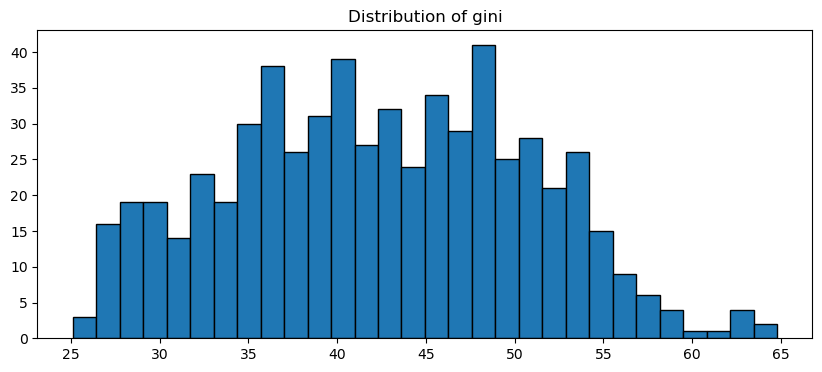

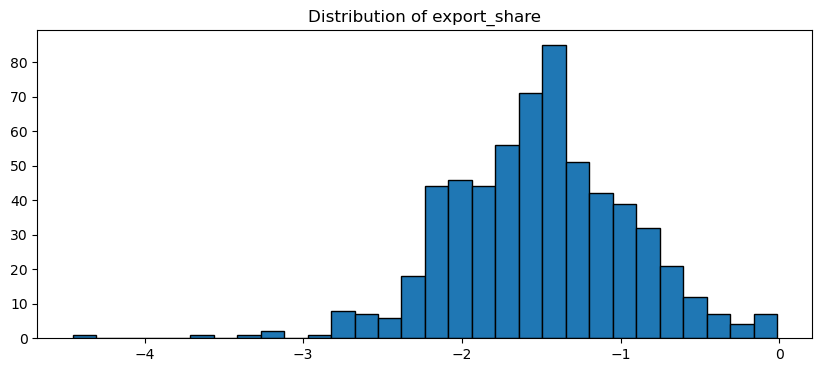

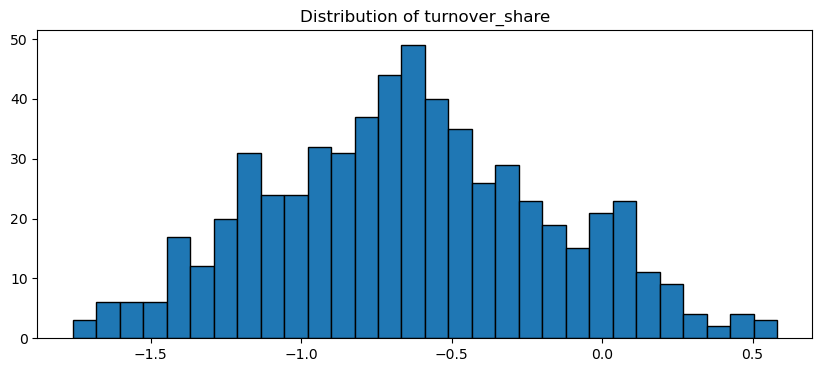

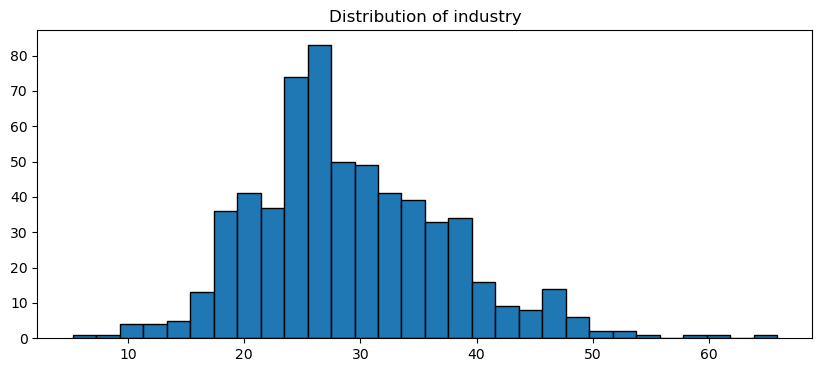

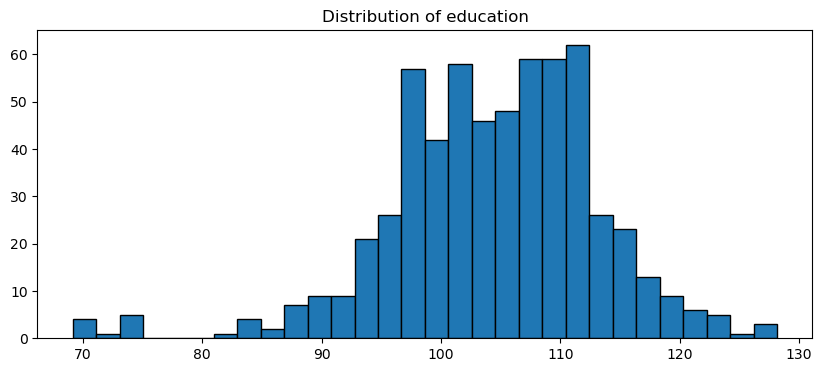

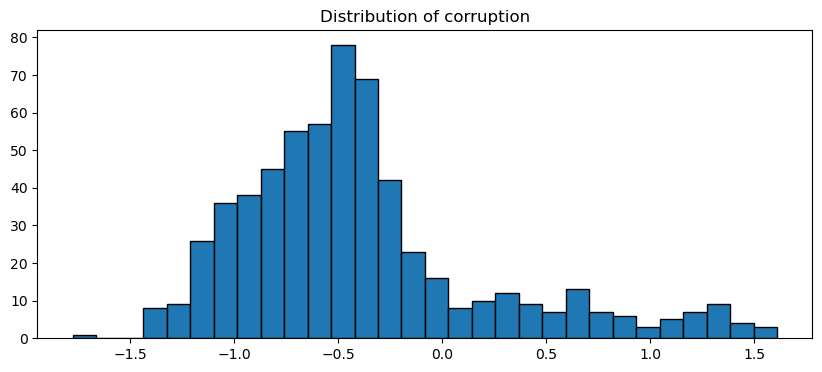

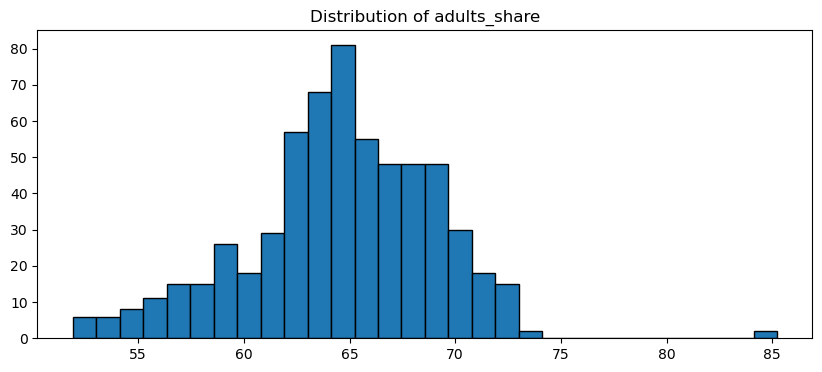

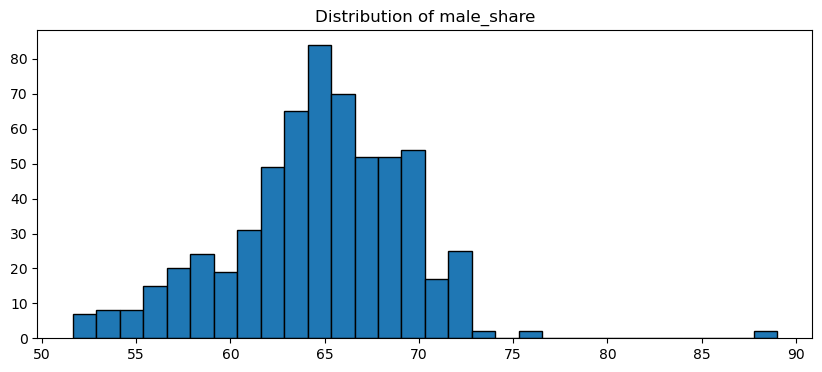

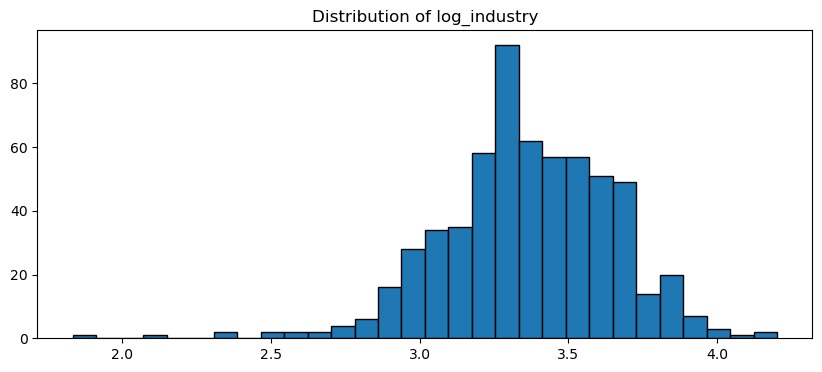

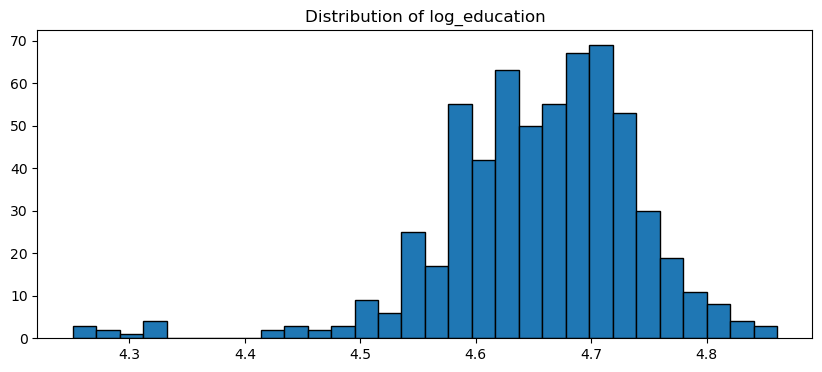

In [386]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

for col in float_columns:
    plt.figure(figsize=(10, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.show()

In [366]:
skewness = df[float_columns].skew()
print(skewness)

gini              0.066461
export_share     -0.289900
turnover_share    0.099871
industry          0.613988
education        -0.711290
corruption        1.167048
adults_share     -0.165345
male_share       -0.028675
dtype: float64


На основании ассиметрии было принято решение логарифмировать industry и education. corruption нельзя логарифмировать, так как показатель содержит отрицательные данные.

In [367]:
df[df['gini'].isna()==False]['country'].value_counts()

country
Peru                  21
Armenia               21
Paraguay              21
Dominican Republic    21
Costa Rica            21
                      ..
Congo                  2
Vanuatu                2
Saint Lucia            1
Marshall Islands       1
Algeria                1
Name: count, Length: 67, dtype: int64

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         606 non-null    object 
 1   year            606 non-null    int64  
 2   gini            606 non-null    float64
 3   export_share    606 non-null    float64
 4   turnover_share  606 non-null    float64
 5   industry        606 non-null    float64
 6   education       606 non-null    float64
 7   corruption      606 non-null    float64
 8   adults_share    606 non-null    float64
 9   male_share      606 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 47.5+ KB


In [369]:
log_transform_cols = ['industry', 'education']

for col in log_transform_cols:
    df[f'log_{col}'] = np.log1p(df[col])

year_dummies = pd.get_dummies(df['year'], prefix='year', drop_first=True)
df = pd.concat([df, year_dummies], axis=1)
    
target = 'gini'
features = ['log_industry',
            'log_education',
            'corruption',
            'export_share',
            'turnover_share',
            'adults_share',
            'male_share']  + list(year_dummies.columns)

df[features] = df[features].apply(pd.to_numeric, errors='coerce')

X = sm.add_constant(df[features])
y = df[target]

model = sm.OLS(y, X.astype(float)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gini   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     10.97
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           7.70e-37
Time:                        19:31:03   Log-Likelihood:                -2018.5
No. Observations:                 606   AIC:                             4093.
Df Residuals:                     578   BIC:                             4216.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -72.1825     16.824     -4.291      0.000    -105.226     -39.139
log_industry      -4.7208      1.404     -3.363      0.001      -7.478      -1.963
log_education     35.6986      3.634      9.823      0.000      28.560      42.837
corruption         3.2381      0.603      5.371      0.000       2.054       4.422
export_share       6.8679      1.058      6.491      0.000       4.790       8.946
turnover_share    -8.0423      1.137     -7.071      0.000     -10.276      -5.808
adults_share       1.7899      0.545      3.287      0.001       0.720       2.859
male_share        -2.2361      0.525     -4.261      0.000      -3.267      -1.205
year_2003         -0.0391      1.813     -0.022      0.983      -3.601       3.522
year_2004          0.2289      1.798      0.127      0.899      -3.303       3.761
year_2005          1.6439      1.748      0.941      0.347      -1.789       5.077
year_2006          1.0517      1.760      0.598      0.550      -2.404       4.508
year_2007          0.5207      1.907      0.273      0.785      -3.224       4.266
year_2008          1.7509      1.795      0.975      0.330      -1.775       5.277
year_2009         -0.1688      1.750     -0.096      0.923      -3.605       3.267
year_2010         -1.1792      1.808     -0.652      0.515      -4.731       2.372
year_2011         -1.0063      1.797     -0.560      0.576      -4.535       2.523
year_2012         -0.9429      1.784     -0.528      0.597      -4.447       2.561
year_2013         -0.0824      1.802     -0.046      0.964      -3.622       3.457
year_2014          0.1185      1.815      0.065      0.948      -3.447       3.684
year_2015         -0.5360      1.718     -0.312      0.755      -3.910       2.838
year_2016         -0.7697      1.813     -0.425      0.671      -4.330       2.791
year_2017         -0.4776      1.855     -0.258      0.797      -4.120       3.165
year_2018         -1.1623      1.756     -0.662      0.508      -4.611       2.286
year_2019         -1.9265      1.803     -1.069      0.286      -5.468       1.615
year_2020         -2.2736      1.915     -1.187      0.236      -6.035       1.488
year_2021         -1.3836      1.814     -0.763      0.446      -4.947       2.180
year_2022         -0.2919      2.054     -0.142      0.887      -4.325       3.742
==============================================================================
Omnibus:                        9.174   Durbin-Watson:                   0.423
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.147
Skew:                           0.095   Prob(JB):                       0.0462
Kurtosis:                       2.544   Cond. No.                     5.60e+03
==============================================================================

Notes:
[1] Standard Errors assume t

# Выводы
Представленные результаты описывают модель линейной регрессии, в которой зависимой переменной является коэффициент Джини. Модель слабо объясняет коэффициент неравенства в развивающихся странах, хотя она статистически значима. Существуют опасения по поводу нормальности остатков и потенциальной мультиколлинеарности. Коэффициенты для "log_industry", "log_education", "corruption", "export_share", "turnover_share", "adults_share" и "male_share" являются статистически значимыми и позволяют получить представление о взаимосвязи между этими переменными и индексом Джини. Однако годовые модели не демонстрируют существенного эффекта.Это наталкивает на мысль, что с течением времени коэффициент Джини в развивающихся странах изменяется слабо и зависит скорее от институциональных и исторических факторов, нежели от тех, которые были в исследовании.

### Краткое описание модели
R-квадрат (R2): 0,339 - примерно 33,9% вариабельности индекса Джини может быть объяснено с помощью модели. Это умеренный уровень объяснительной способности.

Скорректированный R-квадрат: около 30,8% дисперсии коэффициента Джини объясняется моделью после корректировки на количество предикторов.

F-статистика: 21.23 - высокая F-статистика в сочетании с низким p-значением (7,48e-44) позволяет предположить, что модель является статистически значимой.


### Коэффициенты
const (Intercept): -75,1573 - Константа.

log_industry: -4,6662 - Увеличение натурального логарифма доли промышленности в ВВП на одну единицу связано с уменьшением индекса "джини" примерно на 4,67 при сохранении неизменными других переменных. Это статистически значимый показатель (p < 0,001).

log_education: 36,2967 - Увеличение натурального логарифма доли получивших образование на одну единицу связано с увеличением индекса "джини" примерно на 36,30 при сохранении неизменными других переменных. Это статистически значимый показатель (p < 0,001).

corruption: 3,2497 - Увеличение показателя "контроль над коррупцией" на одну единицу связано с увеличением индекса "джини" примерно на 3,25 при сохранении неизменности других переменных. Это статистически значимый показатель (p < 0,001).

export_share: 6,8667 - Увеличение натурального логарифма доли экспорта на одну единицу связано с увеличением индекса джини приблизительно на 6,87 при сохранении неизменными других переменных. Это статистически значимый показатель (p < 0,001).

turnover_share: -7,9362 - Увеличение натурального логарифма доли товарооборота на одну единицу связано с уменьшением индекса джини примерно на 7,94 при сохранении неизменными других переменных. Это статистически значимый показатель (p < 0,001).

adults_share: 1,8082 - Увеличение доли взрослого населения на одну единицу связано с увеличением индекса джини примерно на 1,81 при сохранении неизменными других переменных. Это статистически значимый показатель (p < 0,001).

male_share: -2,2659 - Увеличение доли мужчин на одну единицу связано с уменьшением индекса джини примерно на 2,27 при сохранении неизменными других переменных. Это статистически значимый показатель (p < 0,001).

Коэффициенты для фиктивных данных за год (например, year_2003, year_2004 и т.д.) не являются статистически значимыми (p > 0,05) для большинства лет, что указывает на отсутствие существенных изменений в коэффициенте Джини, связанных с этими годами, после учета других переменных.

### Диагностическая статистика
Критерий Дарбина-Уотсона: 0,432 - Это значение указывает на потенциальную положительную автокорреляцию между остатками, что может указывать на то, что модель, возможно, не отражает все временные закономерности в данных.


Cond. No. - Это указывает на высокую мультиколлинеарность среди предикторов, которая может повлиять на стабильность и интерпретируемость коэффициентов модели.